# Explore here

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# 0.1 - Cargamos el dataframe
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url, delimiter=",")  
df.to_csv("/workspaces/Jacinto-Proyecto-rbol-de-Decisi-n/src/diabetes.csv", index=False)


## 0 - Cargar de datos y revisión General

In [3]:
# 0.2 - Revisamos las primeras filas del dataframe
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 0.3 - Vemos las dimensiones en filas y columnas del dataframe
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 768 filas y 9 columnas.


In [5]:
# 0.4 - Vemos un resumen detallado del dataframe para conocer el tipo de variables
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 0.5 - Observamos los valores unicos de cada columna del df
n_unicos = df.nunique()
n_unicos.sort_values(ascending=False)
n_unicos

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
# 0.6 - Eliminar columnas con valores constantes

# Identificar columnas con un solo valor único
cols_constantes = df.nunique()[df.nunique() == 1].index

# Eliminar estas columnas del DataFrame
if len(cols_constantes) > 0:
    df = df.drop(columns=cols_constantes)
    print(f"Columnas eliminadas: {cols_constantes}")
else:
    print("No se encontraron columnas constantes.")

No se encontraron columnas constantes.


In [8]:
# 0.7 - Comprobar la presencia de filas duplicadas
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")

if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Se eliminaron {duplicados} duplicados. Tamaño final: {df.shape}")


Filas duplicadas encontradas: 0


## 1 - Distribución de las variables y relación entre variables.

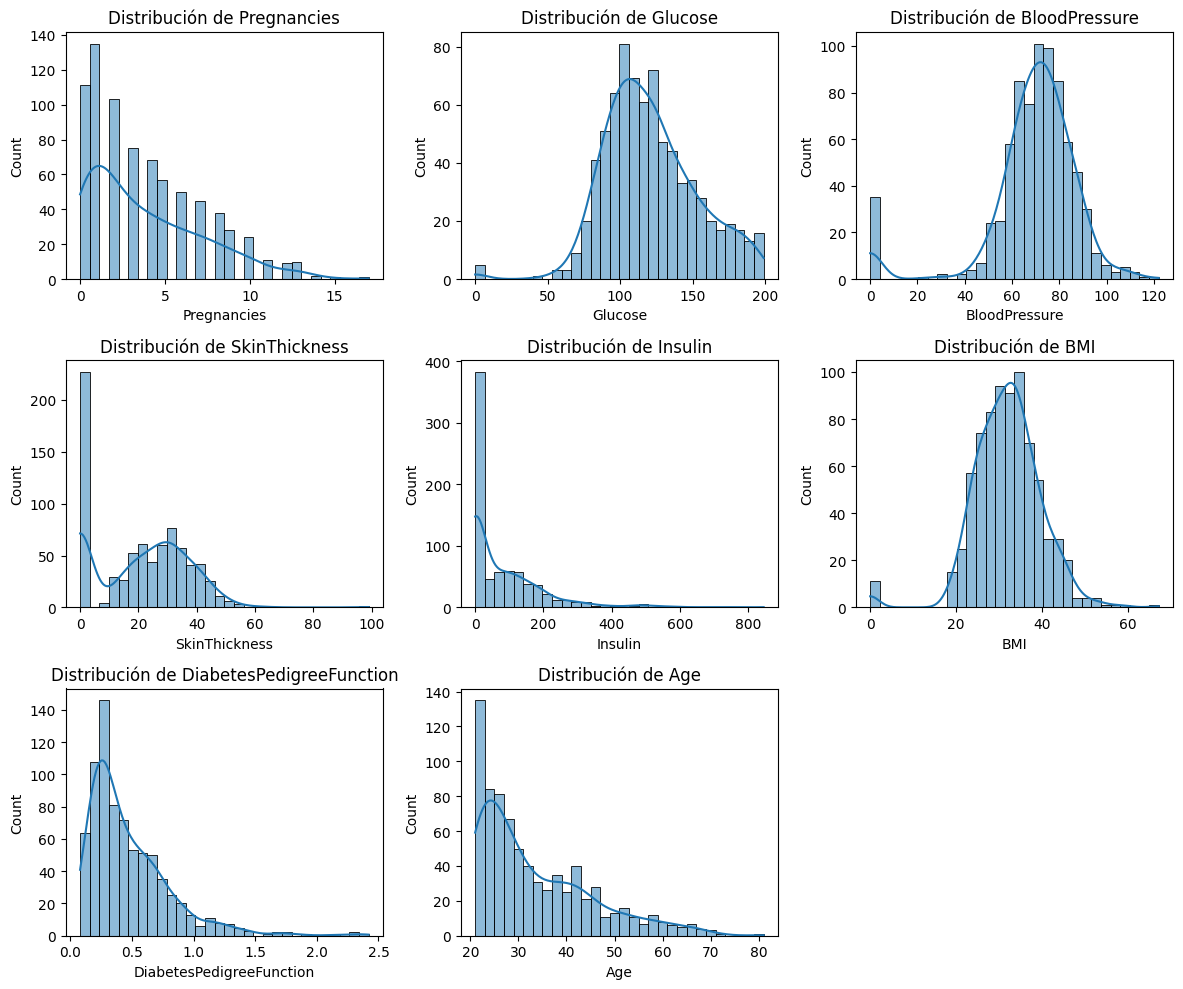

In [9]:
# 1.1 - Visualización de la distribución de las variables numéricas

columnas_numericas = df.columns[:-1]  # Excluimos la variable objetivo "Outcome"

plt.figure(figsize=(12, 10))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[columna], kde=True, bins=30)
    plt.title(f'Distribución de {columna}')
plt.tight_layout()
plt.show()



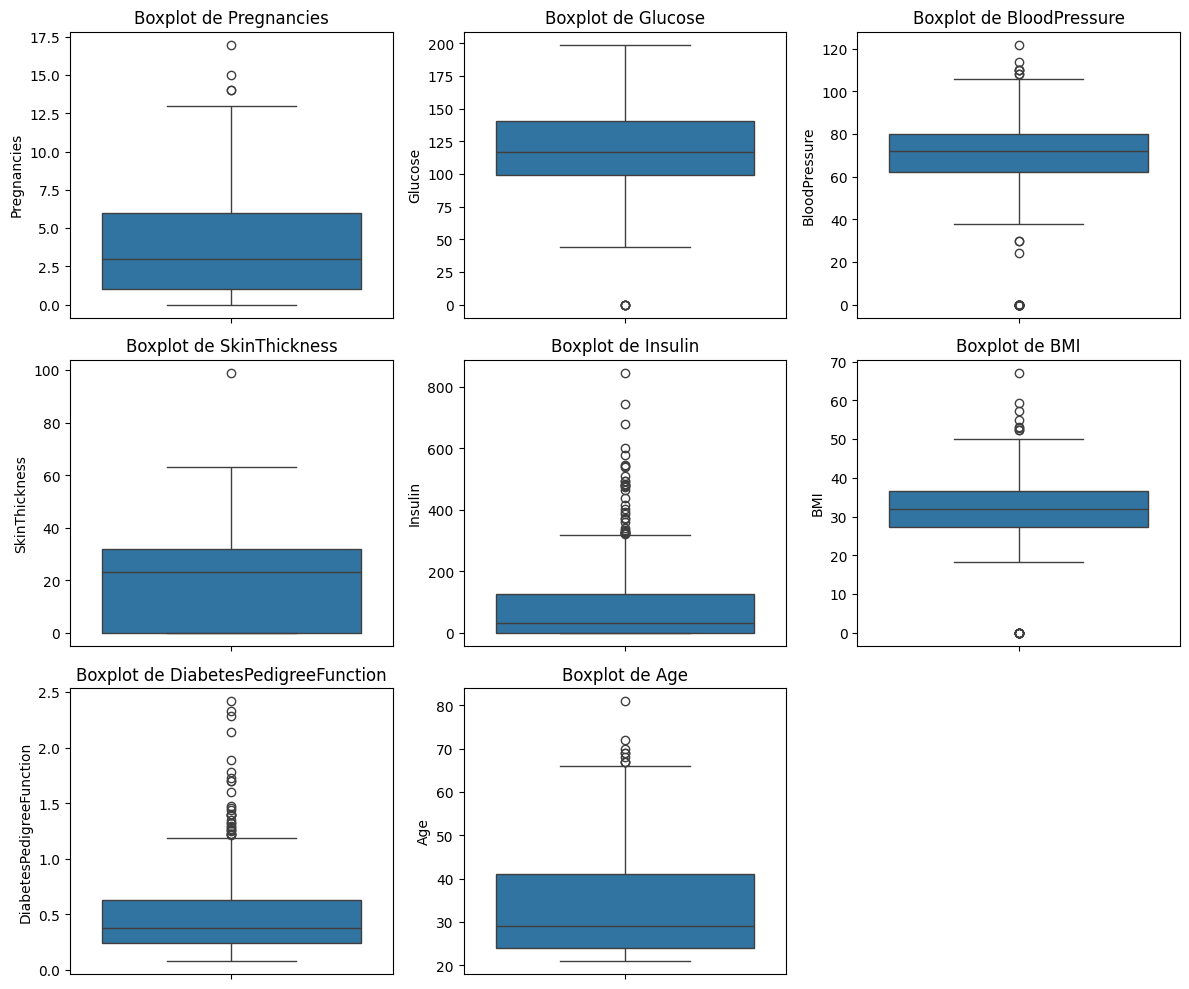

In [10]:
# 1.2 - Boxplots para detectar valores atípicos
plt.figure(figsize=(12, 10))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[columna])
    plt.title(f'Boxplot de {columna}')
plt.tight_layout()
plt.show()

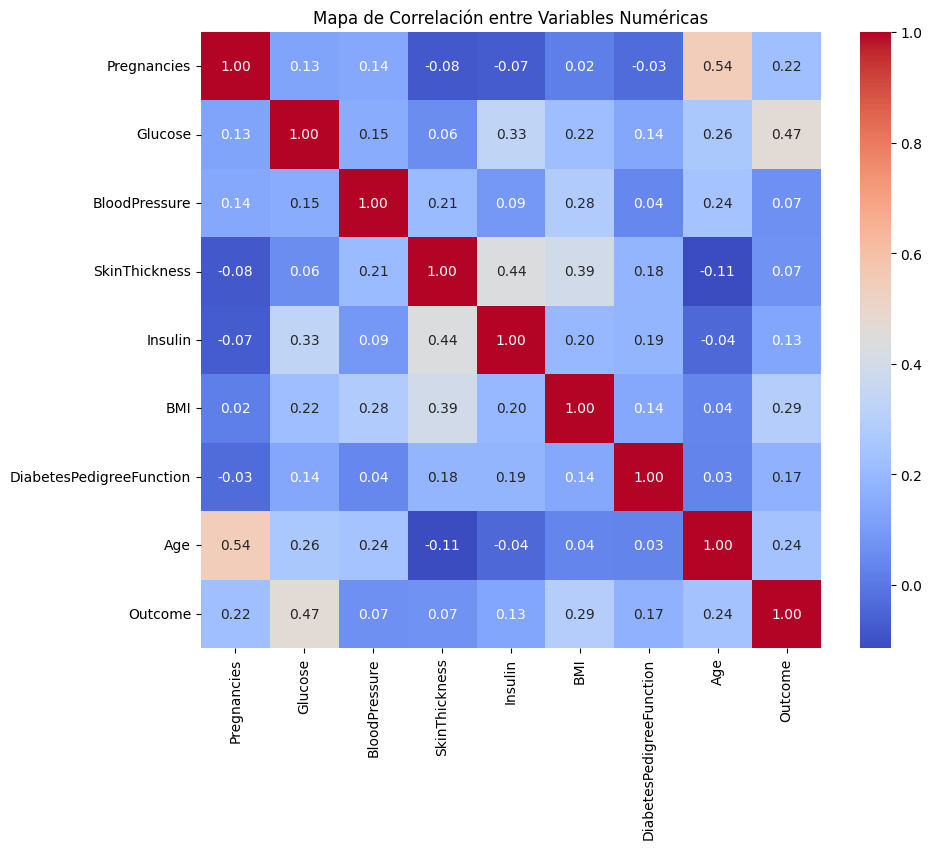

In [11]:
# 1.3 – Mapa de calor de correlación entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación entre Variables Numéricas")
plt.show()

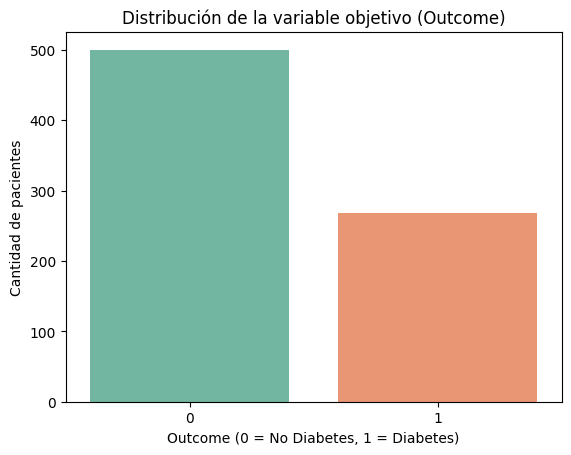

In [13]:
# 1.4 – Distribución de la variable objetivo
sns.countplot(data=df, x="Outcome", hue="Outcome", palette="Set2", legend=False)
plt.title("Distribución de la variable objetivo (Outcome)")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Cantidad de pacientes")
plt.show()

## 2 - Limpieza de Datos

2.1 – Eliminación de valores atípicos con el método IQR

In [14]:
def eliminar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        filtro = (df[columna] >= Q1 - 1.5 * IQR) & (df[columna] <= Q3 + 1.5 * IQR)
        df = df[filtro]
    return df

columnas_numericas = df.columns[df.dtypes != "object"]
df = eliminar_outliers(df, columnas_numericas.drop("Outcome"))

print(f"Después de eliminar outliers, el dataset tiene {df.shape[0]} filas.")

Después de eliminar outliers, el dataset tiene 636 filas.


## 3 - Partición del Dataset en Train/Test

3.1 – Separar características (X) y variable objetivo (y)


In [15]:
X = df.drop(columns=["Outcome"])  # Variables predictoras
y = df["Outcome"]  # Variable objetivo

3.2 – Dividir en entrenamiento y prueba (80/20)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # mantiene balance de clases en train y test
)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

Conjunto de entrenamiento: (508, 8)
Conjunto de prueba: (128, 8)


## Punto 4 – Construcción de árboles de decisión

4.1 – Árbol de Decisión SIMPLE

In [34]:
# Árbol de baja complejidad
modelo_simple = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_simple.fit(X_train, y_train)

# Predicción y evaluación
y_pred_simple = modelo_simple.predict(X_test)
print("Árbol de Decisión SIMPLE")
print(f"Precisión: {accuracy_score(y_test, y_pred_simple):.2f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_simple))

Árbol de Decisión SIMPLE
Precisión: 0.76
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        88
           1       0.76      0.33      0.46        40

    accuracy                           0.76       128
   macro avg       0.76      0.64      0.65       128
weighted avg       0.76      0.76      0.72       128



**Explicacion de resultados:**

Precisión global del modelo: 0.76
El modelo acierta en el 76 % de los casos. A primera vista, parece un rendimiento razonable, pero veamos cómo se comporta específicamente con cada clase.

Clase 0 – No Diabetes
Precision 0.76 → De todas las veces que el modelo predijo "No Diabetes", acertó el 76 % de ellas.

Recall 0.95 → De los pacientes realmente sanos, el 95 % fueron bien clasificados.

Muy buen rendimiento en esta clase, poco margen de error.

Clase 1 – Diabetes
Precision 0.76 → Cuando predijo “Diabetes”, lo hizo bastante bien (igual que la otra clase).

Recall 0.33 → Solo detectó correctamente al 33 % de los pacientes diabéticos.

Aquí hay un problema serio: el modelo falla en 2 de cada 3 casos reales de diabetes.

**Conclusión:**

Este árbol es demasiado conservador: favorece la clase mayoritaria (No Diabetes), y apenas logra detectar correctamente casos reales de diabetes.

Esto puede deberse a:

Profundidad limitada (max_depth=3) → el modelo no puede explorar reglas más complejas.

Desbalance de clases → hay más pacientes sanos que diabéticos.

Falta de ajuste fino en los parámetros del modelo.

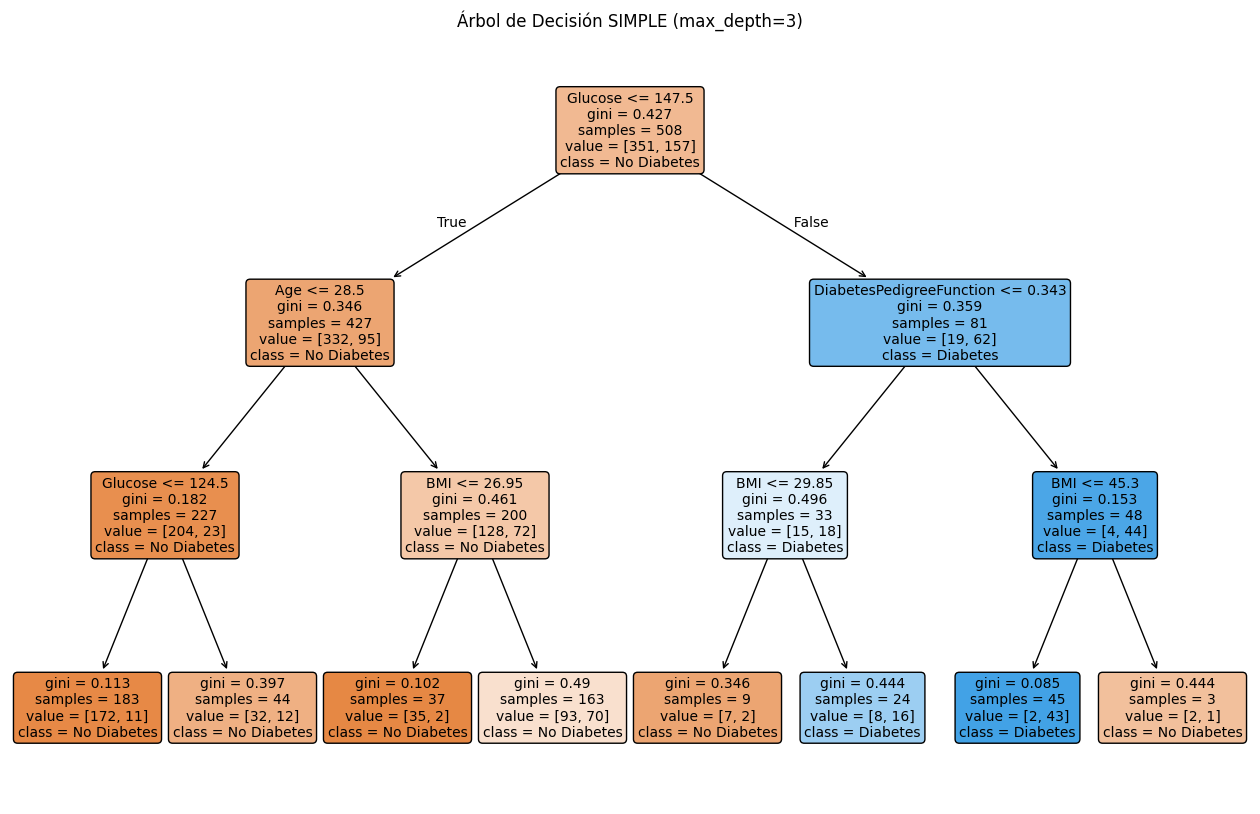

In [36]:
#Visualización del arbol simple

plt.figure(figsize=(16, 10))
plot_tree(modelo_simple,
          filled=True,
          rounded=True,
          feature_names=X_train.columns,
          class_names=["No Diabetes", "Diabetes"],
          fontsize=10)
plt.title("Árbol de Decisión SIMPLE (max_depth=3)")
plt.show()

4.2 – Árbol de Decisión COMPLEJO (ajustado manualmente)

In [37]:
# Árbol más profundo y ajustado
modelo_complejo = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42
)

modelo_complejo.fit(X_train, y_train)
y_pred_complejo = modelo_complejo.predict(X_test)

print("Árbol de Decisión COMPLEJO")
print(f"Precisión: {accuracy_score(y_test, y_pred_complejo):.2f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_complejo))

Árbol de Decisión COMPLEJO
Precisión: 0.59
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        88
           1       0.39      0.55      0.45        40

    accuracy                           0.59       128
   macro avg       0.57      0.58      0.56       128
weighted avg       0.63      0.59      0.60       128



**Explicacion de resultados:**

Precisión global: 0.59
Este modelo clasifica correctamente el 59 % de los pacientes. Es inferior a la del modelo simple (76 %), pero hay más matices que mirar.

Clase 0 – No Diabetes
Precision 0.75: de todas las veces que el modelo dijo "No Diabetes", acertó el 75 %.

Recall 0.60: solo detectó el 60 % de los pacientes realmente sanos (bajó respecto al modelo simple).

Clase 1 – Diabetes
Recall 0.55: gran mejora respecto al modelo simple, que tenía solo 0.33.

Precision 0.39: el modelo comete más falsos positivos (gente sana que predice como diabética).

F1-score 0.45: mejora respecto al 0.46 del árbol simple, aunque sigue bajo.

**Conclusión:**

Este árbol sacrifica precisión general para detectar mejor los casos de diabetes. Esto puede ser útil en un contexto clínico, donde es más importante no dejar pasar casos positivos aunque eso signifique tener algunas falsas alarmas.

Sin embargo, el modelo todavía no está bien equilibrado. Podríamos considerar:
Aplicar SMOTE para balancear clases (más ejemplos de clase 1 sintéticos)
Explorar otros modelos como Random Forest o XGBoost
Realizar una optimización con GridSearchCV, que podría ajustar los hiperparámetros de forma más precisa que lo que hicimos manualmente

Comparación directa con el modelo simple
Métrica	Árbol Simple	Árbol Complejo
Precisión global	0.76	0.59
Recall Clase 1	0.33	0.55 ✅
Recall Clase 0	0.95	0.60 ❌
Falsos negativos	Muy alto en complejo (mejoró clase 1)
Falsos positivos	Aumentaron en clase 0

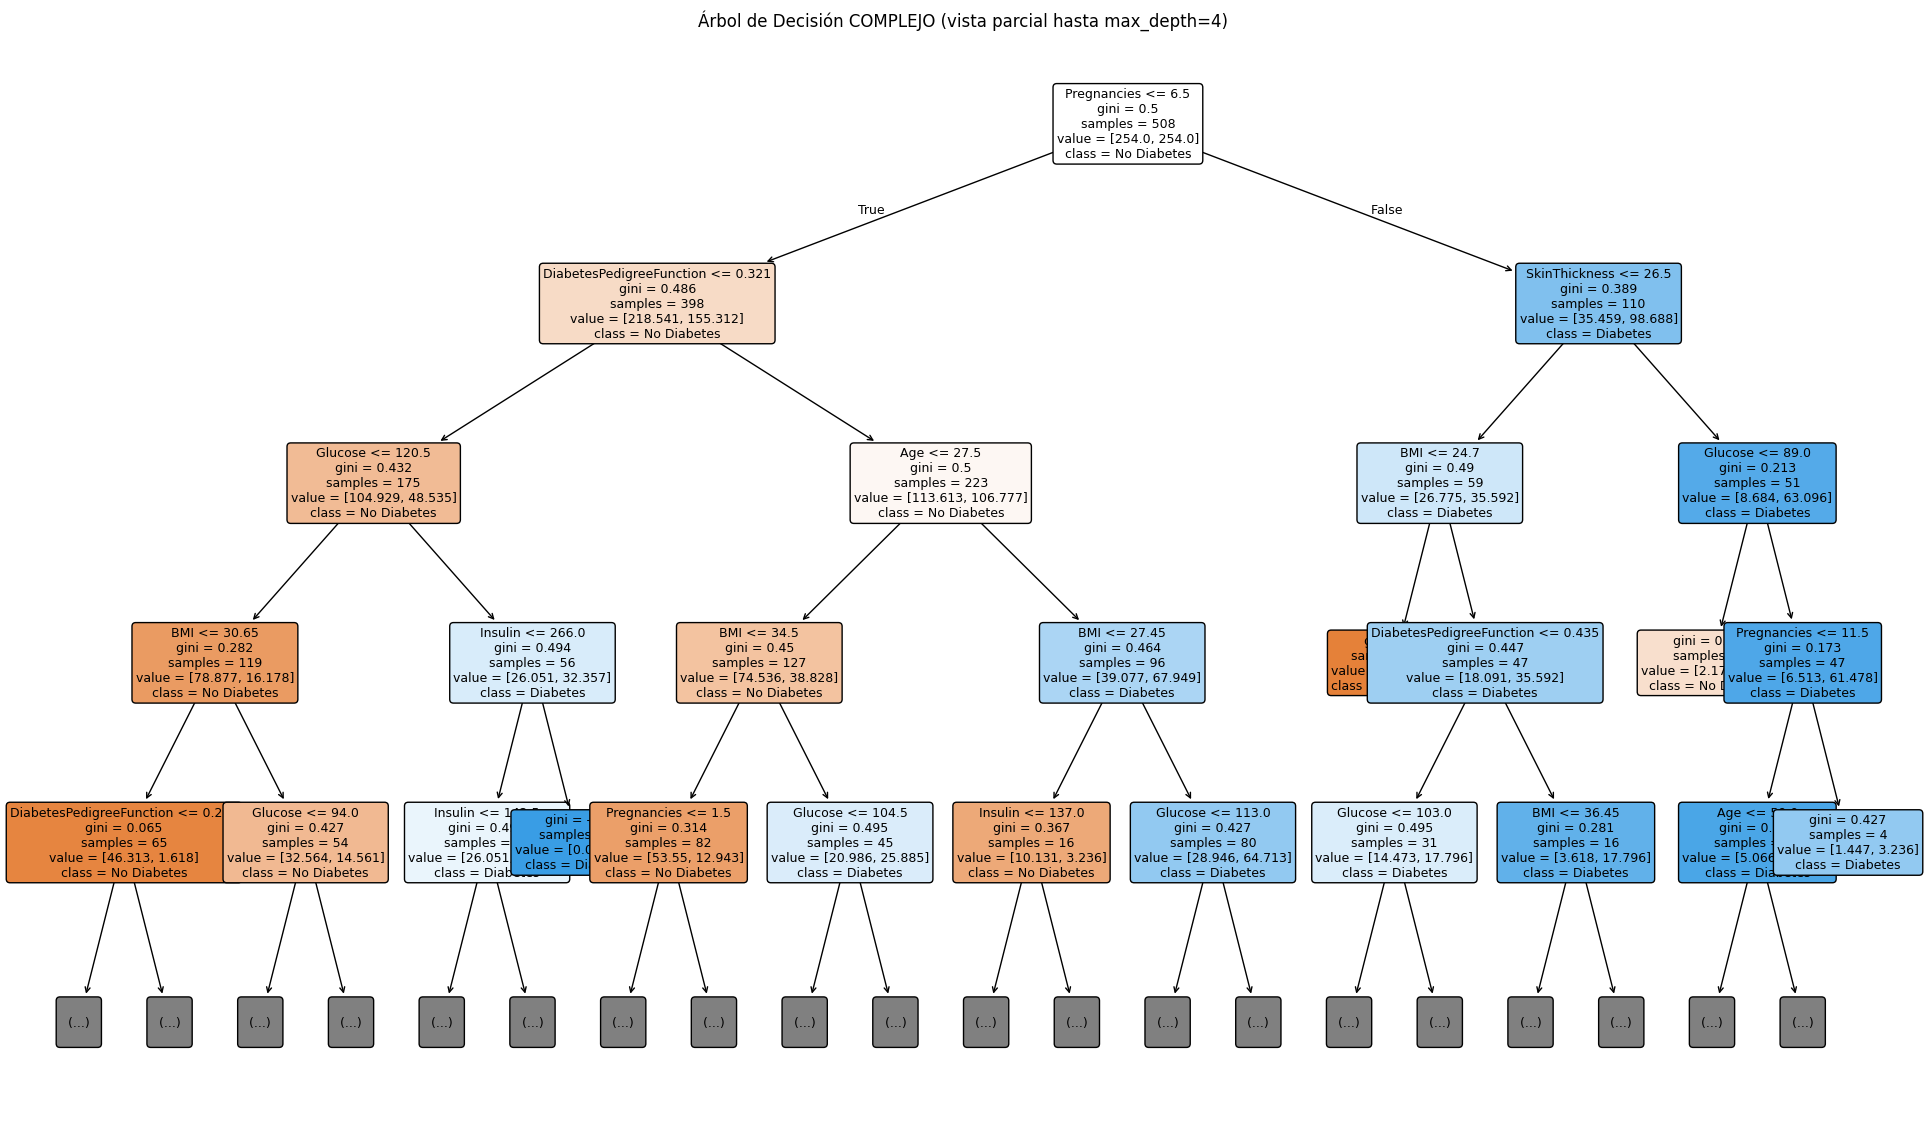

In [24]:
plt.figure(figsize=(24, 14))
plot_tree(modelo_complejo,
          filled=True,
          rounded=True,
          feature_names=X_train.columns,
          class_names=["No Diabetes", "Diabetes"],
          max_depth=4,  # Limitamos visualización si es muy grande
          fontsize=9)
plt.title("Árbol de Decisión COMPLEJO (vista parcial hasta max_depth=4)")
plt.show()

4.3 – Matrices de Confusión de ambos modelos

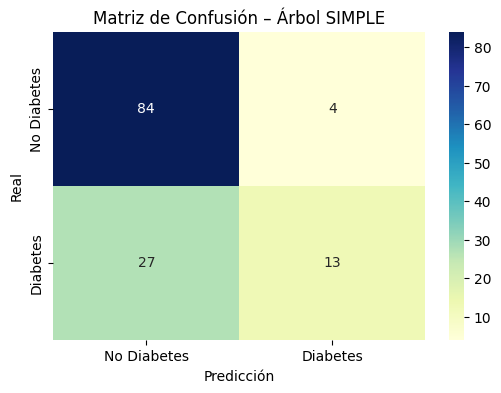

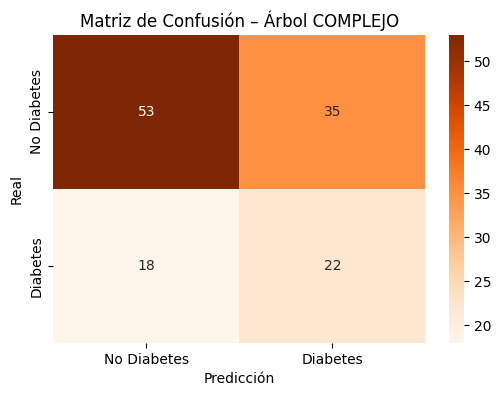

In [ ]:
# Árbol simple
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_simple), annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión – Árbol SIMPLE")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Árbol complejo
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_complejo), annot=True, fmt='d', cmap="Oranges",
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión – Árbol COMPLEJO")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## 5 – Optimización con GridSearchCV

5.1 – Definir la rejilla de parámetros

In [25]:
# Parámetros a evaluar
parametros = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}

5.2 – Configurar el GridSearchCV

In [38]:
modelo_base = DecisionTreeClassifier(class_weight="balanced", random_state=42)

grid_search = GridSearchCV(
    estimator=modelo_base,
    param_grid=parametros,
    cv=5,
    scoring="f1",  # o "recall" si priorizas capturar positivos
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


5.3 – Crear nuevo modelo con los parámetros óptimos

In [29]:
modelo_optimo = grid_search.best_estimator_
modelo_optimo.fit(X_train, y_train)

# Predicción
y_pred_optimo = modelo_optimo.predict(X_test)

5.4 – Evaluación del modelo optimizado

Reporte de clasificación - Modelo Optimizado
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        88
           1       0.48      0.55      0.51        40

    accuracy                           0.67       128
   macro avg       0.63      0.64      0.63       128
weighted avg       0.69      0.67      0.68       128



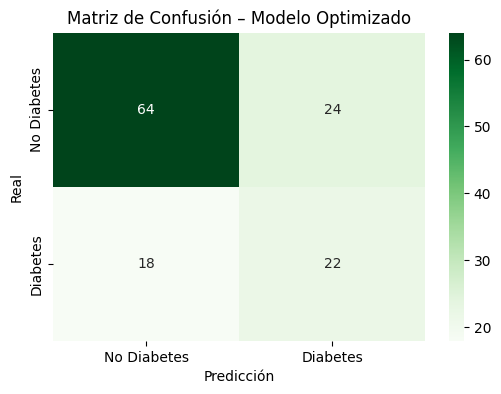

In [39]:
print("Reporte de clasificación - Modelo Optimizado")
print(classification_report(y_test, y_pred_optimo))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_optimo), annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión – Modelo Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Explicacion de resultados:**

Precisión general: 0.67
El modelo acierta en el 67 % de los casos en el conjunto de prueba. No supera la precisión del árbol simple (0.76), pero como ya sabemos, eso no lo es todo. Lo que importa es cómo trata los casos más delicados: los pacientes con diabetes.

Clase 0 (No Diabetes)
Muy buena precisión (0.78) y un recall del 73 %, lo que indica que el modelo sigue identificando correctamente la mayoría de los pacientes sanos.

Clase 1 (Diabetes)
Recall: 0.55 → Mejora clara frente al árbol simple (recall = 0.33).

Precisión: 0.48 → Casi la mitad de las predicciones de "diabetes" fueron correctas.

Aunque no perfecto, este resultado supera lo obtenido con los árboles anteriores, especialmente en balance.

El optimizado tiene mayor equilibrio entre detectar diabéticos y no caer en tantos errores como el complejo sin ajustar.

**Conclusión:**

Tras aplicar GridSearchCV, encontramos una configuración que equilibra mejor el rendimiento del modelo. Aunque la precisión global se reduce frente al árbol simple, la capacidad para identificar pacientes con diabetes mejora significativamente. Este resultado es clínicamente más útil, ya que prioriza detectar la enfermedad incluso a costa de algún falso positivo.

## 6 – Guardado del modelo entrenado

In [40]:
# Guardar el modelo optimizado
joblib.dump(modelo_optimo, "modelo_arbol_decision_final.pkl")
print("El modelo optimizado ha sido guardado exitosamente.")

El modelo optimizado ha sido guardado exitosamente.
